<a href="https://colab.research.google.com/github/FlokPRO/FCE_25.1/blob/main/Prova_2_FCE_Miqueias_Paixao_Concluido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

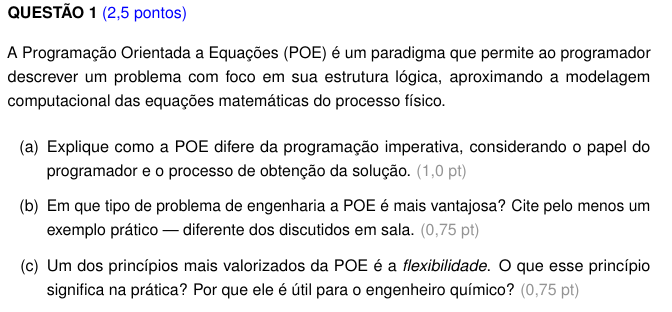

1.a) O POE vai modelar o problema por meio de equações matemáticas, descrevendo toda a lógica e vai entrar um solucionador do programa pra alcançar os resultados.

A programaçao imperativa o papel do programador é descrever todo os passos com as ferramentas de programaçao, como: loops, fors, arrays e outras. E o resultado também vem do próprio programador, pois foi ele que definiu os passos para se chegar ao resultado.

b) Acredito que em problemas que exigem a manibulação de diversas variáveis, equaçoes, quando a complexibilidade aumenta. Um exemplo prático bem legal, é um projeto que estou desenvolvendo sobre eficiencia energetica em turbogeradores. Nele possui diversas equaçoes, pelo menos 5 equações por turbogerador em um parque de no mínimo 3 turbogeradores. Essas equaçoes estao ligadas ao balanço de massa, energia e tambem ao específico de turbina. O principal objetivo é saber qual a quantidade de vapor alocar para cada turbo gerador, olhando pressao, temperatura, vazao e potencia ativa. É bem complexo e o POE entra como um grande passo para ajudar a alcançar o resultado.

c) Segundo os slides das aulas " A flexibilidade tem como caracteristica que o mesmo conjunto de equações pode ser resolvido para diferentes variáveis.". Na prática, isso reflete muito em resoluçoes que voce precisa utilizar as mesmas equações alterando as variáveis, como por exemplo, em um análise de Pinch, geralmente utilizada por engenheiros na fase de concepção ou alteracao de um projeto com intuito maximizar a integracao energética. As equações usadas, são as mesmas geralmente, o que vai variar é são as caracteristicas das variaveis, por exemplo o tipo de tubulacao, qual fluido e suas caracteristicas, diametros de tubo, etc...

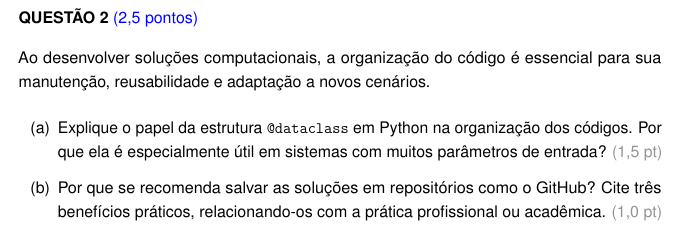

2)a) Ela consegue agrupar diversas variáveis dentro de uma classe. E quando por exemplo eu vou usar em um código que preciso definir termodinamicamente os fluidos, usam vários parametros (Pressão, temperatura, velocidade de escoamento, vazao, coeficiencientes termodinamicos, etc...) é muito interessante agrupar em classes distintas, exemplo eu separaria em uma classe base (temperatura, pressao e vazao) e outra classe os coeficientes termofinamicos, e em outra algo para o tipo de escoamento que estaria presente. Portanto, eu concluo que em um sistema que tem muitos parâmetros utilizar essa ferramenta se torna extremamente util para organizacao e classificacao dessas variaveis.

b) É interessante salvar os códigos no GitHub pois além de conseguir deixar de fácil acesso caso precise acessar de diversas máquina, voce pode utilizar o código que criou em diversos outros códigos no Colab acessando esse código que salvou no GitHub. Vale lembrar também da possibilidade de você deixar esse código aberto ou fechado, conseguindo compartilhar com pessoas que voce queira. Vale salientar também que voce pode ir personalizando seu código com o tempo e salvando diversas versoes.

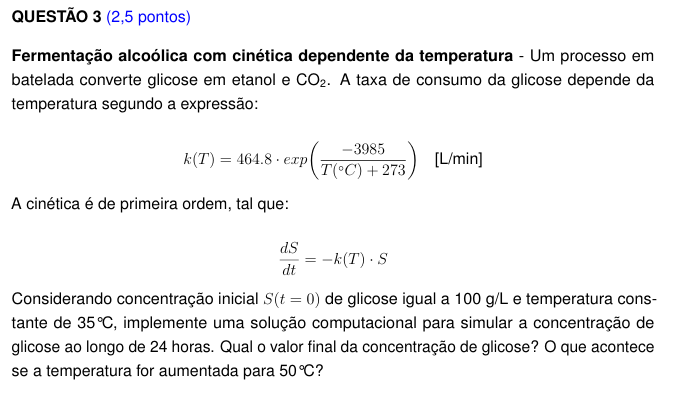

Concentração após 24h: 19.99 g/L
Concentração após 24h a 50°C: 5.30 g/L


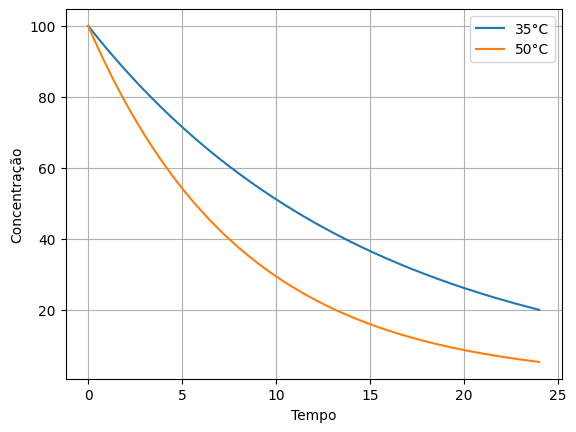

In [ ]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt

@dataclass
class dados_base:
    S0: float      # Conc inicial g/L
    T: float       # Temp °C
    t_total: float # Tempo h
    dt: float      # delta_t min

def cte_cinetica(T_c: float) -> float:
    """
    O objetivo dessa função é calcular k(T) por meio da temperatura.
    """
    T_k = T_c + 273
    return 464.8 * np.exp(-3985 / T_k)

def simular_cinetica(params: dados_base):
    """
    O objetivo é simular a concentração pelo tempo.
    """
    n_p = int(params.t_total * 60 / params.dt) + 1
    t = np.linspace(0, params.t_total, n_p)
    S = np.zeros(n_p)
    S[0] = params.S0
    k = cte_cinetica(params.T)
    for i in range(1, n_p):
        dS = -k * S[i-1] * params.dt
        S[i] = max(S[i-1] + dS, 0)
    return t, S

# Parâmetros a 35°C
params_35 = dados_base(S0=100, T=35, t_total=24, dt=1)
t_35, S_35 = simular_cinetica(params_35)
print(f'Concentração após 24h: {S_35[-1]:.2f} g/L')

# Parâmetros a 50°C
params_50 = dados_base(S0=100, T=50, t_total=24, dt=1)
t_50, S_50 = simular_cinetica(params_50)
print(f'Concentração após 24h a 50°C: {S_50[-1]:.2f} g/L')

# (Opcional) Gráfico
plt.plot(t_35, S_35, label="35°C")
plt.plot(t_50, S_50, label="50°C")
plt.xlabel('Tempo')
plt.ylabel('Concentração')
plt.legend()
plt.grid(True)
plt.show()

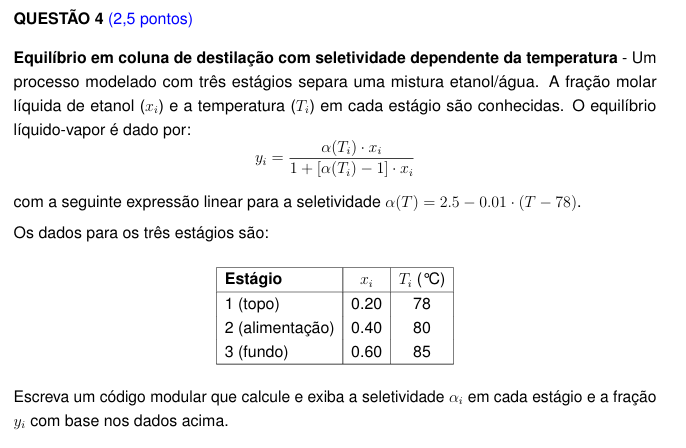

In [ ]:
from dataclasses import dataclass

@dataclass
class estagio:
    x: float
    T: float
    grupo: str # Define grupo as an attribute of type str


def seletividade(T):
    """Calcula a seletividade α(T)"""
    return 2.5 - 0.01 * (T - 78)

def fracao_vapor(x, alpha):
    """Calcula a fração no vapor y"""
    return (alpha * x) / (1 + (alpha - 1) * x)


grupos = [
    estagio(0.20, 78, "Topo"),
    estagio(0.40, 80,"Alimentacao"),
    estagio(0.60, 85, "Fundo")
]

for estagio in grupos:
    alpha = seletividade(estagio.T)
    y = fracao_vapor(estagio.x, alpha)
    print(f"O estágio é {estagio.grupo}, na temperatura de {estagio.T} °C possui uma seletividade de {alpha} e a fraçao de yi:{y:.2f}")

O estágio é Topo, na temperatura de 78 °C possui uma seletividade de 2.5 e a fraçao de yi:0.38
O estágio é Alimentacao, na temperatura de 80 °C possui uma seletividade de 2.48 e a fraçao de yi:0.62
O estágio é Fundo, na temperatura de 85 °C possui uma seletividade de 2.43 e a fraçao de yi:0.78
